# Linear Discriminant Analysis (supervised learning)


In [1]:
from IPython.display import Image

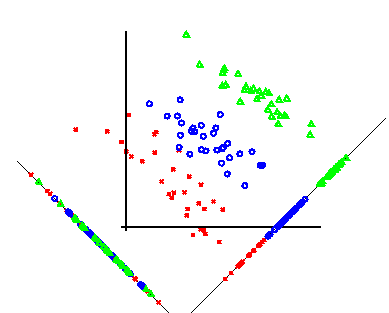

In [2]:
Image('lda-1.png')

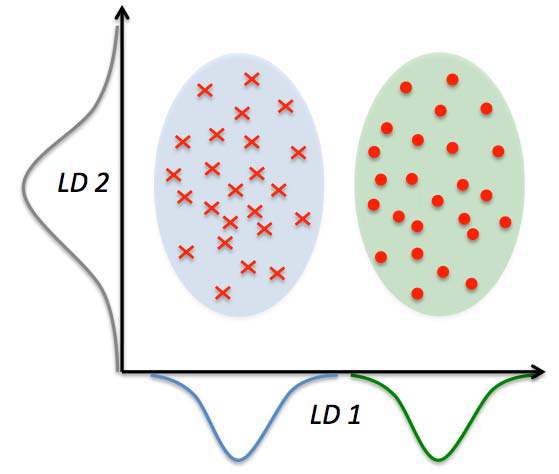

In [3]:
Image('lda-2.png')

Gives best results for linearly seperable classes.

### Objective:

1. minimize the with-in-class scatter - $S_w$.
2. maximize the between-class scatter - $S_B$.

$\therefore$ Maximize $\frac{\|S_B\|}{\|S_w\|}$ $\implies$ Maximize $S_w^{-1}S_B$

### Algorithm:

1. Standardize the $d$ -dimensional dataset ( $d$ is the number of features).
2. For each class, compute the $d$ -dimensional mean vector.
3. Construct the between-class scatter matrix $S_B$ and the within-class scatter
   matrix $S_w$.
4. Compute the eigenvectors and corresponding eigenvalues of the
   matrix $S^{-1}_wS_B$.
5. Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues to
construct a $d \times k$ -dimensional transformation matrix $W$ ; the eigenvectors are
the columns of this matrix.
6. Project the samples onto the new feature subspace using the transformation
matrix $W$.

### Mean matrix:

Computes mean of features for individual classes:

$$m_i = \frac{1}{n_i}\sum_{x \in D_i}^c x_m$$

### Scatter matrices:

$$S_w = \sum_{i=1}^c S_i$$

Individual scatter matrix $S_i$:

$$S_i = \sum_{x \in D_i}^c (x-m_i)(x-m_i)^T$$

$$\implies \Sigma_i = \frac{1}{N_i}S_w$$ It is nothing but the normalized version of scatter matrix.

$$S_B = \sum_{i=1}^c N_i (m_i-m)(m_i-m)^T$$

where 
1. $m$ - overall mean.
2. $N_i$ - number of samples belonging to $i^{th}$ class

Let's consider an example.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [5]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [10]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.lda import LDA

C:\Anaconda2\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [12]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,Y_train)

In [13]:
X_train_lda.shape

(133L, 2L)

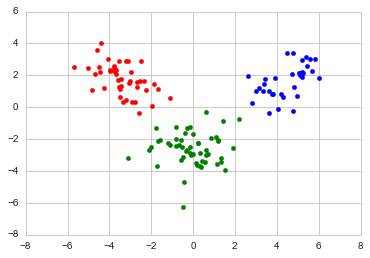

In [14]:
clrs = ['red','green','blue']
for i in range(1,4):
    plt.scatter(X_train_lda[:,0][Y_train==i],X_train_lda[:,1][Y_train==i],color=clrs[i-1])
    

Then we can proceed with Regression,SVM,clustering etc